# WORKSHOP: Introduction to Machine Learning: Hands-on Tabular Data


## Few words about Jupyter

Jupyter (the short name for "Jupyter Notebooks") is an interactive development environment where you can combine code, the result its execution, and also text, images, and even videos or interactive widgets.

The current file is a Jupyter Notebook.

You can execute code directly in "cells" and see the result.

In [1]:
1 + 1

2

The code could be simple or more complex

In [1]:
def hello_you(you:str):
    """Welcome"""
    print(f"Hello {you}!")


hello_you("Jeff")

Hello Jeff!


## Few words about Pandas

`pandas` is the most popular Python module for Data Science: it manipulates data in the form of tables (called `DataFrame`). It is like a super version of Excel that you could use straight from Python.

It integrates perfectly with Jupyter Notebooks because you can see the tables directly, scroll them, ...

For example, this is an example of all NASDAQ-listed companies with their financial status, followed by all the S&P 500 Companies with their sector.

Usually, we import pandas as `import pandas as pd` so later in the code wee can use `pd` to access Pandas functions.

We also use the variable name `df` (or some variants) for a DataFrame.

In [3]:
import pandas as pd
df = pd.read_csv("https://datahub.io/core/nasdaq-listings/r/nasdaq-listed.csv")
df

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size
0,AAIT,iShares MSCI All Country Asia Information Tech...,iShares MSCI All Country Asia Information Tech...,G,N,N,100.0
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0
...,...,...,...,...,...,...,...
2962,ZN,Zion Oil & Gas Inc,Zion Oil & Gas Inc - Common Stock,G,N,N,100.0
2963,ZNGA,Zynga Inc.,Zynga Inc. - Class A Common Stock,Q,N,N,100.0
2964,ZSPH,"ZS Pharma, Inc.","ZS Pharma, Inc. - Common Stock",G,N,N,100.0
2965,ZU,"zulily, inc.","zulily, inc. - Class A Common Stock",Q,N,N,100.0


In [4]:
df_sp500 = pd.read_csv("https://datahub.io/core/s-and-p-500-companies/r/constituents.csv")
df_sp500

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care
...,...,...,...
500,YUM,Yum! Brands,Consumer Discretionary
501,ZBRA,Zebra Technologies,Information Technology
502,ZBH,Zimmer Biomet,Health Care
503,ZION,Zions Bancorp,Financials


We can look at what the type of columns with `dtypes`:

* `bool`: boolean
* `float64`: float numbers
* `int64`: integer numbers
* `datetime64[ns]`: dates
* `object`: usually type for strings, lists, dictionaries, and class objects

In [11]:
from datetime import datetime
from pathlib import Path

df_with_types = pd.DataFrame(
    [("some string", Path("myfile.txt"), True, 1, 10.3, "10.3", datetime.now(), [1, 2, 3])],
    columns=["a_string", "a_path", "a_bool", "an_int", "a_float", "a_float_as_str", "a_date", "a_list"],
)

print(df_with_types.dtypes)
print("=" * 20)
df_with_types

a_string                  object
a_path                    object
a_bool                      bool
an_int                     int64
a_float                  float64
a_float_as_str            object
a_date            datetime64[ns]
a_list                    object
dtype: object


,a_string,a_path,a_bool,an_int,a_float,a_float_as_str,a_date,a_list
0,some string,myfile.txt,True,1,10.3,10.3,2021-10-18 18:58:24.800219,"[1, 2, 3]"


You can do a lot of things:

* Easily create new columns
* Extract columns or rows or data from them (e.g. all unique values, minimum, maximum, ...)
* Compute new rows or columns based on other column, rows, or even `DataFrames`
* Plot some statistics

All of that is very fast and in only very few commands.

Data columns can be retrieved in 2 ways:

* By using `.` operator **if the name of column don't have spaces, hyphen, or characters that are not letter, number, or underscore (`_`): `df.Sector`
* By using the square brackets with the name of column as a string: `df["Symbol"]` or `df["Company Name"]

In [68]:
df["Double Round"] = df["Round Lot Size"] * 2
df["C-I-S"] = df["Market Category"] + df["Test Issue"] + df["Financial Status"]
df["is Inc."] = df["Company Name"].str.contains("Inc.")
df

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size,Double Round,C-I-S,is Inc.
0,AAIT,iShares MSCI All Country Asia Information Tech...,iShares MSCI All Country Asia Information Tech...,G,N,N,100.0,200.0,GNN,False
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0,200.0,QNN,True
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0,200.0,GNN,False
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0,200.0,GNN,True
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0,200.0,QNN,True
...,...,...,...,...,...,...,...,...,...,...
2962,ZN,Zion Oil & Gas Inc,Zion Oil & Gas Inc - Common Stock,G,N,N,100.0,200.0,GNN,False
2963,ZNGA,Zynga Inc.,Zynga Inc. - Class A Common Stock,Q,N,N,100.0,200.0,QNN,True
2964,ZSPH,"ZS Pharma, Inc.","ZS Pharma, Inc. - Common Stock",G,N,N,100.0,200.0,GNN,True
2965,ZU,"zulily, inc.","zulily, inc. - Class A Common Stock",Q,N,N,100.0,200.0,QNN,False


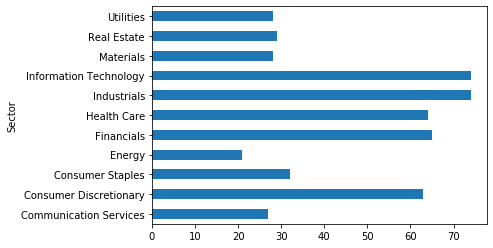

In [56]:
df_sp500.groupby("Sector").count()["Symbol"].plot.barh()

In [72]:
df_small = df[["Symbol", "Company Name", "Round Lot Size", "C-I-S"]]
df_small

,Symbol,Company Name,Round Lot Size,C-I-S
0,AAIT,iShares MSCI All Country Asia Information Tech...,100.0,GNN
1,AAL,"American Airlines Group, Inc.",100.0,QNN
2,AAME,Atlantic American Corporation,100.0,GNN
3,AAOI,"Applied Optoelectronics, Inc.",100.0,GNN
4,AAON,"AAON, Inc.",100.0,QNN
...,...,...,...,...
2962,ZN,Zion Oil & Gas Inc,100.0,GNN
2963,ZNGA,Zynga Inc.,100.0,QNN
2964,ZSPH,"ZS Pharma, Inc.",100.0,GNN
2965,ZU,"zulily, inc.",100.0,QNN


Usually, when you modify a `DataFrame`, it will return a new `DataFrame`, so you can either:

* Store to a variable (a new name or the same one)
* Use the argument `inplace=True` to replace the existing `DataFrame`

In [73]:
df_small = df_small.drop("C-I-S", axis=1)  # axis=1 means we drop a column
df_small

,Symbol,Company Name,Round Lot Size
0,AAIT,iShares MSCI All Country Asia Information Tech...,100.0
1,AAL,"American Airlines Group, Inc.",100.0
2,AAME,Atlantic American Corporation,100.0
3,AAOI,"Applied Optoelectronics, Inc.",100.0
4,AAON,"AAON, Inc.",100.0
...,...,...,...
2962,ZN,Zion Oil & Gas Inc,100.0
2963,ZNGA,Zynga Inc.,100.0
2964,ZSPH,"ZS Pharma, Inc.",100.0
2965,ZU,"zulily, inc.",100.0


In [75]:
df_small.drop("Round Lot Size", axis=1, inplace=True)
df_small

,Symbol,Company Name
0,AAIT,iShares MSCI All Country Asia Information Tech...
1,AAL,"American Airlines Group, Inc."
2,AAME,Atlantic American Corporation
3,AAOI,"Applied Optoelectronics, Inc."
4,AAON,"AAON, Inc."
...,...,...
2962,ZN,Zion Oil & Gas Inc
2963,ZNGA,Zynga Inc.
2964,ZSPH,"ZS Pharma, Inc."
2965,ZU,"zulily, inc."


## Introduction to Machine Learning

### AI vs Machine Learning (ML) vs Deep Learning (DL)



<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   id="svg8"
   version="1.1"
   viewBox="0 0 170.53616 154.25772"
   height="55.0mm"
   width="66.0mm">
  <metadata
     id="metadata5">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     transform="translate(-31.781746,-75.772934)"
     id="layer1"
     inkscape:groupmode="layer"
     inkscape:label="Layer 1">
    <ellipse
       ry="77.12886"
       rx="85.268082"
       cy="152.90179"
       cx="117.04983"
       id="path833"
       style="fill:#80b3ff;stroke:none;stroke-width:0.2;stroke-linecap:round;stroke-linejoin:round;stroke-dashoffset:0.78236" />
    <text
       id="text837"
       y="158.25133"
       x="36.272762"
       style="font-size:12.7px;line-height:1.25;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';letter-spacing:-0.00529167px;word-spacing:0px;stroke-width:0.264583"
       xml:space="preserve"><tspan
         sodipodi:role="line"
         style="font-style:normal;font-variant:normal;font-weight:bold;font-stretch:normal;font-size:16.9333px;font-family:Calibri;-inkscape-font-specification:'Calibri, Bold';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-variant-east-asian:normal;stroke-width:0.264583"
         y="158.25133"
         x="36.272762"
         id="tspan835">AI</tspan></text>
    <ellipse
       style="fill:#2a7fff;stroke:none;stroke-width:0.143307;stroke-linecap:round;stroke-linejoin:round;stroke-dashoffset:0.78236"
       id="ellipse839"
       cx="129.07309"
       cy="152.90179"
       rx="63.542824"
       ry="53.139103" />
    <text
       xml:space="preserve"
       style="font-size:12.7px;line-height:1.25;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';letter-spacing:-0.00529167px;word-spacing:0px;stroke-width:0.264583"
       x="71.803505"
       y="158.25133"
       id="text837-8"><tspan
         id="tspan835-3"
         x="71.803505"
         y="158.25133"
         style="font-style:normal;font-variant:normal;font-weight:bold;font-stretch:normal;font-size:16.9333px;font-family:Calibri;-inkscape-font-specification:'Calibri, Bold';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-variant-east-asian:normal;stroke-width:0.264583"
         sodipodi:role="line">ML</tspan></text>
    <ellipse
       ry="34.050682"
       rx="37.643963"
       cy="152.90179"
       cx="145.26994"
       id="ellipse859"
       style="fill:#002255;stroke:none;stroke-width:0.0882955;stroke-linecap:round;stroke-linejoin:round;stroke-dashoffset:0.78236" />
    <text
       id="text837-8-2"
       y="158.27614"
       x="114.00956"
       style="font-size:12.7px;line-height:1.25;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';letter-spacing:-0.00529167px;word-spacing:0px;fill:#ffffff;stroke-width:0.264583"
       xml:space="preserve"><tspan
         sodipodi:role="line"
         style="font-style:normal;font-variant:normal;font-weight:bold;font-stretch:normal;font-size:16.9333px;font-family:Calibri;-inkscape-font-specification:'Calibri, Bold';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-variant-east-asian:normal;fill:#ffffff;stroke-width:0.264583"
         y="158.27614"
         x="114.00956"
         id="tspan835-3-5">DL</tspan></text>
    <text
       id="text881"
       y="164.98515"
       x="36.373489"
       style="font-size:12.7px;line-height:0.6;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';letter-spacing:-0.00529167px;word-spacing:0px;stroke-width:0.264583"
       xml:space="preserve"><tspan
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:6.35px;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-variant-east-asian:normal;stroke-width:0.264583"
         y="164.98515"
         x="36.373489"
         id="tspan879"
         sodipodi:role="line">Artificial</tspan><tspan
         id="tspan883"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:6.35px;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-variant-east-asian:normal;stroke-width:0.264583"
         y="172.60515"
         x="36.373489"
         sodipodi:role="line">Intelligence</tspan></text>
    <text
       xml:space="preserve"
       style="font-size:12.7px;line-height:0.6;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';letter-spacing:-0.00529167px;word-spacing:0px;stroke-width:0.264583"
       x="72.43602"
       y="164.97275"
       id="text881-6"><tspan
         sodipodi:role="line"
         id="tspan879-8"
         x="72.43602"
         y="164.97275"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:6.35px;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-variant-east-asian:normal;stroke-width:0.264583">Machine</tspan><tspan
         sodipodi:role="line"
         x="72.43602"
         y="172.59274"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:6.35px;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-variant-east-asian:normal;stroke-width:0.264583"
         id="tspan883-2">Learning</tspan></text>
    <text
       id="text881-6-0"
       y="164.81927"
       x="114.64207"
       style="font-size:12.7px;line-height:0.6;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';letter-spacing:-0.00529167px;word-spacing:0px;fill:#ffffff;stroke-width:0.264583"
       xml:space="preserve"><tspan
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:6.35px;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-variant-east-asian:normal;fill:#ffffff;stroke-width:0.264583"
         y="164.81927"
         x="114.64207"
         id="tspan879-8-8"
         sodipodi:role="line">Deep</tspan><tspan
         id="tspan883-2-2"
         style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:6.35px;font-family:Calibri;-inkscape-font-specification:'Calibri, Normal';font-variant-ligatures:normal;font-variant-caps:normal;font-variant-numeric:normal;font-variant-east-asian:normal;fill:#ffffff;stroke-width:0.264583"
         y="172.43927"
         x="114.64207"
         sodipodi:role="line">Learning</tspan></text>
  </g>
</svg>

* **Artificial Intelligence (AI)**: Computers that can imitate human intellect and behaviors. It could be a system of multiple ML algorithms in an autonomous vehicles or also a simple algorithm to control a home appliance.
* **Machine Learning (ML)**: Statistic algorithm that allow AI implementation through data.
* **Deep Learning (DL)**: Machine Learning that uses Neural Networks to proceed to the learning from data.

### Myths about Deep Learning

A lot of people assume that you need all kinds of hard-to-find stuff to get great results with deep learning, but as you'll see in this book, those people are wrong. This is a list of a few thing you *absolutely don't need* to do world-class deep learning:


Myth (don't need) | Truth 
--- | --- 
Lots of math | Just high school math is sufficient
Lots of data | We've seen record-breaking results with < 50 items of data
Lots of expensive computers | You can get what you need for state of the art work for free

Deep learning has power, flexibility, and simplicity. That's why we believe it should be applied across many disciplines. These include the social and physical sciences, the arts, medicine, finance, scientific research, and many more.

Here's a list of some of the thousands of tasks in different areas at which deep learning, or methods heavily using deep learning, is now the best in the world:

|Area | Tasks |
|:--- | :--- |
Natural language processing (NLP)| Answering questions; speech recognition; summarizing documents; classifying documents; finding names, dates, etc. in documents; searching for articles mentioning a concept
Medicine| Finding anomalies in radiology images, including CT, MRI, and X-ray images; counting features in pathology slides; measuring features in ultrasounds; diagnosing diabetic retinopathy
Biology| Folding proteins; classifying proteins; many genomics tasks, such as tumor-normal sequencing and classifying clinically actionable genetic mutations; cell classification; analyzing protein/protein interactions
Computer vision| Satellite and drone imagery interpretation (e.g., for disaster resilience); face recognition; image captioning; reading traffic signs; locating pedestrians and vehicles in autonomous vehicles
Image generation| Colorizing images; increasing image resolution; removing noise from images; converting images to art in the style of famous artists
Recommendation systems| Web search; product recommendations; home page layout
Playing games| Chess, Go, most Atari video games, and many real-time strategy games
Robotics| Handling objects that are challenging to locate (e.g., transparent, shiny, lacking texture) or hard to pick up
Other applications| Financial and logistical forecasting, text to speech, and much more...

### Is Machine Learning recent?

In 1949, an IBM researcher named Arthur Samuel started working on a different way to get computers to complete tasks, which he called "machine learning".

His idea was: instead of telling the computer the exact steps required to solve a problem, show it examples of the problem to solve, and let it figure out how to solve it itself.

This turned out to be very effective: by 1961 his checkers-playing program had learned so much that it beat the Connecticut state champion! Here's how he described his idea (from the same essay as above):

> : Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. We need not go into the details of such a procedure to see that it could be made entirely automatic and to see that a machine so programmed would "learn" from its experience.

There are a number of powerful concepts embedded in this short statement:

- The idea of a "weight assignment" 
- The fact that every weight assignment has some "actual performance"
- The requirement that there be an "automatic means" of testing that performance,  
- The need for a "mechanism" (i.e., another automatic process) for improving the performance by changing the weight assignments

**Weights** are just variables, and a weight assignment is a particular choice of values for those variables. The program's inputs are values that it processes in order to produce its results—for instance, taking image pixels as inputs, and returning the classification "dog" as a result. The program's weight assignments are other values that define how the program will operate.


... So, normally a program will look like this:

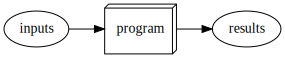

In [3]:
import graphviz
def gv(s): return graphviz.Source(f'digraph G{{ rankdir="LR" {s}; }}')

# A traditional program
gv('''program[shape=box3d width=1 height=0.7] inputs->program->results''')

... but based on Samuel's idea, this is what training a machine learning model looks like:

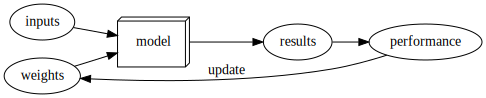

In [7]:
# Training a machine learning model [Arthur Samuel's version, ~1962]
gv('''ordering=in model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

Notice the distinction between the model **results** (e.g., the moves in a checkers game)
and its **performance** (e.g., whether it wins the game, or how quickly it wins). 


### Machine Learning Process

The wording has changed and now we talk of:

* **parameters** instead of "weights"
* **architecture** instead of "model" (although we still use that term)
* **prediction** instead of "results"
* **loss** instead of "performance"

And to compute the **loss**, we need to have data to compare: it is called **validation data**.

The inputs will use **training data** to train the architecture.

The updated diagram looks like this:

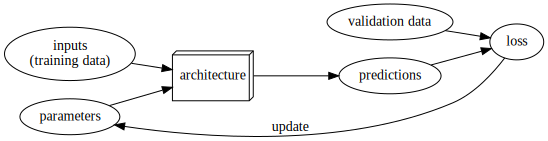

In [10]:
# Training a machine learning model [updated version]
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs[label="inputs\n(training data)"]
valid[label="validation data"]
inputs->model->predictions; parameters->model; valid->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

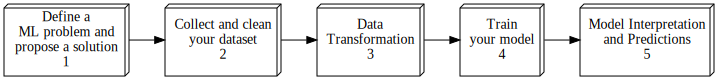

In [11]:
gv('''ordering=in
problem[shape=box3d width=1 height=1 label="Define a \n ML problem and \n propose a solution\n1"]
dataset[shape=box3d width=1 height=1 label="Collect and clean \n your dataset\n2"]
transform[shape=box3d width=1 height=1 label="Data\n Transformation\n3"]
train[shape=box3d width=1 height=1 label="Train \n your model\n4"]
predict[shape=box3d width=1 height=1 label="Model Interpretation \n and Predictions\n5"]
problem->dataset->transform->train->predict''')

# Application to Tabular Data

Let's talk about the most impactful machine learning applications for business, which is Tabular Data.

> Tabular means your data is *structured* in tables, e.g in spreadsheets, CSVs and SQL databases.

## Libraries & Dependencies needed for Tabular Data

A bunch of modules required to run this workshop

In [1]:
!pip install -q -r requirements.txt

from fastbook import *

from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

# import seaborn as sns

## What is Tabular Modeling?

Tabular modeling takes data in the form of a table (like a spreadsheet or CSV).
Tabular data consists of 4 key elements that are described below. Make sure to carefully go through them as they serve as the foundation of what is to come in this chapter.

### Samples

**Samples** (marked in green in the screenshot below) are the rows of data in your tabular data. Every row contains a set of data points, and depending on the data set can represent one user profile, one transaction, one product etc.

In the image below, each sample shows the profile of one adult in the adult dataset.

### Features

**Features** (marked in red) are the columns of data in your tabular data. Each feature represents a measurable piece of data that can be used for analysis: Name, Age, Sex, Fare, and so on. Features are also sometimes referred to as “variables” or “attributes.” Depending on what you're trying to analyze, the features you include in your dataset can vary widely.

### Target
The **target** (marked in blue) is the variable that you want to predict in your tabular data. The target is usually the last column of the properly prepared tabular dataset.

### Dataset
The **dataset** is the combination of all samples, features and the target and the entire dataset including all data points and values.

[](./images/Dataset_explanation.png)

**The objective is to predict the value of the target variable based on the values of the features variables.**

The target depends on the other variables in your study, and is thus called the *dependent* variable. The dependent variable is the *effect/outcome*.

The features are independent of other variables in your study, and are thus called the *independent* variables. The *independent* variables are the *cause*. 


> Note: Depending on your actual project objective, the target variable could be any of the feature variables in the dataset.

Having covered the key elements that build the foundation of tabular data, let's learn and explore what types of data are stored inside tabular data.

## Tabular Data Types

### Numerical Data

**Numerical** data is any data where data points are exact numbers.This data has meaning as a measurement such as house prices or as a count, like a number of residential properties in Shanghai or how many houses sold in the past year. 

*Numerical* data can be characterized by **continuous** or **discrete** data. *Continuous* data can assume any value within a range whereas *discrete* data has distinct values.

> Numerical data is not ordered in time. They are just numbers that we have collected.

For example, the number of students taking Python class would be a discrete data. You can only have discrete whole number values like 10, 25, or 33. A class cannot have 12.75 students enrolled. A student either join a class or he doesn’t. On the other hand, continuous data are numbers that can fall anywhere within a range. Like a student could have an average score of 88.25 which falls between 0 and 100.

<a name="data_types"></a>
### Categorial Data

**Categorical data** represents characteristics, such as a hockey player’s position, team, hometown. *Categorical data* can take *numerical* values. For example, maybe we would use 1 for the colour red and 2 for blue. But these numbers don’t have a mathematical meaning. That is, we can’t add them together or take the average.
In the context of classification, *categorical data* would be the class label. This would also be something like if a person is a man or woman, or property is residential or commercial.

### Ordinal Data

**Ordinal data** mixes numerical and categorical data. In ordinal data, the data still falls into categories, but those categories are ordered or ranked in some particular way. An example would be "class difficulty", such as beginner, intermediate, and advanced. Those three types of classes would be a way that we could label the classes, and they have a natural order in increasing difficulty.

Ordinal data are often treated as categorical. However, unlike categorical data, the numbers do have mathematical meaning (in our example, the bigger the number, the harder the difficulty).

## Tabular Data Machine Learning Problems

> ML Tasks and ML Problems are interchangeable terms.

### Regression Problem

If you are trying to predict a *continuous* value, it means you work on a **regression** problem.

> Reminder: A *regression model* is one that attempts to predict one or more numeric quantities, such as a temperature or a location. It looks at the entire dataset, trains itself and finds patterns and features that impact the target variable. Based on that and its trained parameters it can produce educated predictions based on the data.

### Classification Problem

If you aim to build a tabular model, that predicts a *category*, it is a **classification** task. In this notebook, we will be focusing on a classification task.

> Reminder: A *classification model* is one that attempts to predict a "class", also called "category". That is, it's predicting from a number of discrete possibilities, such as "dog" or "cat". Just like in a regression problem, it also considers the entire dataset and finds patterns in the data. The approach is similar, the output is different as it predicts one value among a set of pre-defined categories.

## Tabular Modeling Machine Learning Workflow

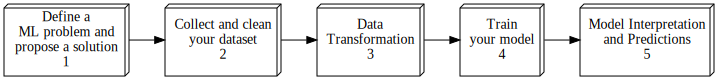

In [4]:
gv('''ordering=in
problem[shape=box3d width=1 height=1 label="Define a \n ML problem and \n propose a solution\n1"]
dataset[shape=box3d width=1 height=1 label="Collect and clean \n your dataset\n2"]
transform[shape=box3d width=1 height=1 label="Data\n Transformation\n3"]
train[shape=box3d width=1 height=1 label="Train \n your model\n4"]
predict[shape=box3d width=1 height=1 label="Model Interpretation \n and Predictions\n5"]
problem->dataset->transform->train->predict''')

1. ***Define a ML problem and propose a solution:*** 

Your goal in regards to Tabular Data would be to determine:

* Is the problem you will work on Classification or Regression?

* What features or independent variables are required to make an accurate prediction? 

* What observable and quantifiable performance metric you will pick? For example, in a classification problem we could use **accuracy** as a metric (we learned more about accuracy as a metric in the copmuter vision chapter) and in a regression problem we could use the **mean squared error** as a metric.

> The mean squared error (MSE) shows how accurate your predictions are in a regression problem. It does so by calculating the difference between your model’s predictions and the ground truth, square it, and average it out across the whole dataset. It tells you how close a regression line is to a set of points of your dataset.

2. ***Collect and construct your dataset:*** 

For many tabular machine learning projects this is the most tedious and time consuming operation that can vary significantly from project to project. 
As our main objective is to learn how Machine Learning algorithms can help us with Tabular Data problems, we will provide you with prepared and already cleaned datasets. So for now we omit this step, but surely will get back to you when you will begin working on your individual machine learning project in one of our advanced Bootcamps.

Moreover, we will split the dataset into the training, validation, and test set. We will also define the dependent and independent variables as well as the, categorical, numerical, and ordinal datat types for the model.

3. ***Data Transformation:***

It's normal that the original dataset can have many imperfections and redundant features (remember what features represent in a tabular dataset) that are irrelevant to predict the target variable. In some cases they can even negatively affect the model training. Thus data transformation techniques such as feature selection, feature extraction, and data preprocessing will make sure that your dataset is refined and ready to be fed into the model for training. Down below you can find few techniques that we will cover in the coursebook. 

||Feature Selection |Data Prepocessing|
|:---|:--- |:--- |
|Definition|Selecting a subset of features <br> relevant to our target variable <br> to use in model  construction. | Preparing (cleaning and organizing) <br> the raw data to make it suitable for a <br> building and training Machine Learning models. |
|Techniques| - Missing Values <br> - Feature Importance <br> - Redundant Features | - Categorify <br> - Fill Missing<br> - Normalize|


4. ***Train your model:*** 

Just like during the last week, we will be applying an artificial neural network to train and learn from our tabular data to build our model and help us make predictions. 

5. ***Interpret the model and make predictions:***

In order to further interpret the performance of the model we will employ interpretation techniques.